## SVM

## IMPORTING THE MAJOR LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\module 7\pulsar_data_train.csv")
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


## EDA

In [8]:
df.shape

(12528, 9)

In [10]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [12]:
col_names = df.columns

In [58]:
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM_SNR Mean', 'DM_SNR Sd', 'DM_SNR Kurtosis', 'DM_SNR Skewness', 'target_class']

In [60]:
df

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM_SNR Mean,DM_SNR Sd,DM_SNR Kurtosis,DM_SNR Skewness,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0
...,...,...,...,...,...,...,...,...,...
12522,124.828125,50.586731,0.233563,-0.286908,2.342809,13.949966,9.226188,117.308146,0
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0


In [62]:
df['target_class'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
4        0
7        0
        ..
12522    0
12523    0
12525    0
12526    0
12527    0
Name: target_class, Length: 9273, dtype: int32>

In [64]:
df['target_class'] = df['target_class'].astype(int)

C:\Users\aride\AppData\Local\Temp\ipykernel_17572\1682476883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target_class'] = df['target_class'].astype(int)


In [66]:
df['target_class'].value_counts()

target_class
0    8423
1     850
Name: count, dtype: int64

In [68]:
df['target_class'].value_counts() / float(len(df))

target_class
0    0.908336
1    0.091664
Name: count, dtype: float64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9273 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          9273 non-null   float64
 1   IP Sd            9273 non-null   float64
 2   IP Kurtosis      9273 non-null   float64
 3   IP Skewness      9273 non-null   float64
 4   DM_SNR Mean      9273 non-null   float64
 5   DM_SNR Sd        9273 non-null   float64
 6   DM_SNR Kurtosis  9273 non-null   float64
 7   DM_SNR Skewness  9273 non-null   float64
 8   target_class     9273 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 688.2 KB


In [72]:
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM_SNR Mean        0
DM_SNR Sd          0
DM_SNR Kurtosis    0
DM_SNR Skewness    0
target_class       0
dtype: int64

In [74]:
df['IP Kurtosis'].dropna(inplace = True)

C:\Users\aride\AppData\Local\Temp\ipykernel_17572\3520497518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IP Kurtosis'].dropna(inplace = True)


In [76]:
df = df.dropna()

In [78]:
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM_SNR Mean        0
DM_SNR Sd          0
DM_SNR Kurtosis    0
DM_SNR Skewness    0
target_class       0
dtype: int64

## OUTLIERS DETECTION AND REMOVAL

In [81]:
round(df.describe(), 2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM_SNR Mean,DM_SNR Sd,DM_SNR Kurtosis,DM_SNR Skewness,target_class
count,9273.00,9273.00,9273.00,9273.00,9273.00,9273.00,9273.00,9273.00,9273.00
mean,111.13,46.51,0.48,1.79,12.74,26.33,8.33,105.78,0.09
std,25.69,6.78,1.07,6.29,29.77,19.54,4.55,108.17,0.29
min,6.19,24.77,-1.74,-1.79,0.21,7.37,-2.64,-1.98,0.00
25%,100.98,42.40,0.02,-0.19,1.91,14.38,5.79,34.92,0.00
50%,115.23,46.90,0.22,0.20,2.80,18.44,8.43,83.15,0.00
75%,127.33,51.00,0.47,0.93,5.46,28.39,10.72,139.77,0.00
max,189.73,91.81,8.07,68.10,211.95,110.64,34.54,1191.00,1.00


Text(0.5, 1.0, 'IP Mean')

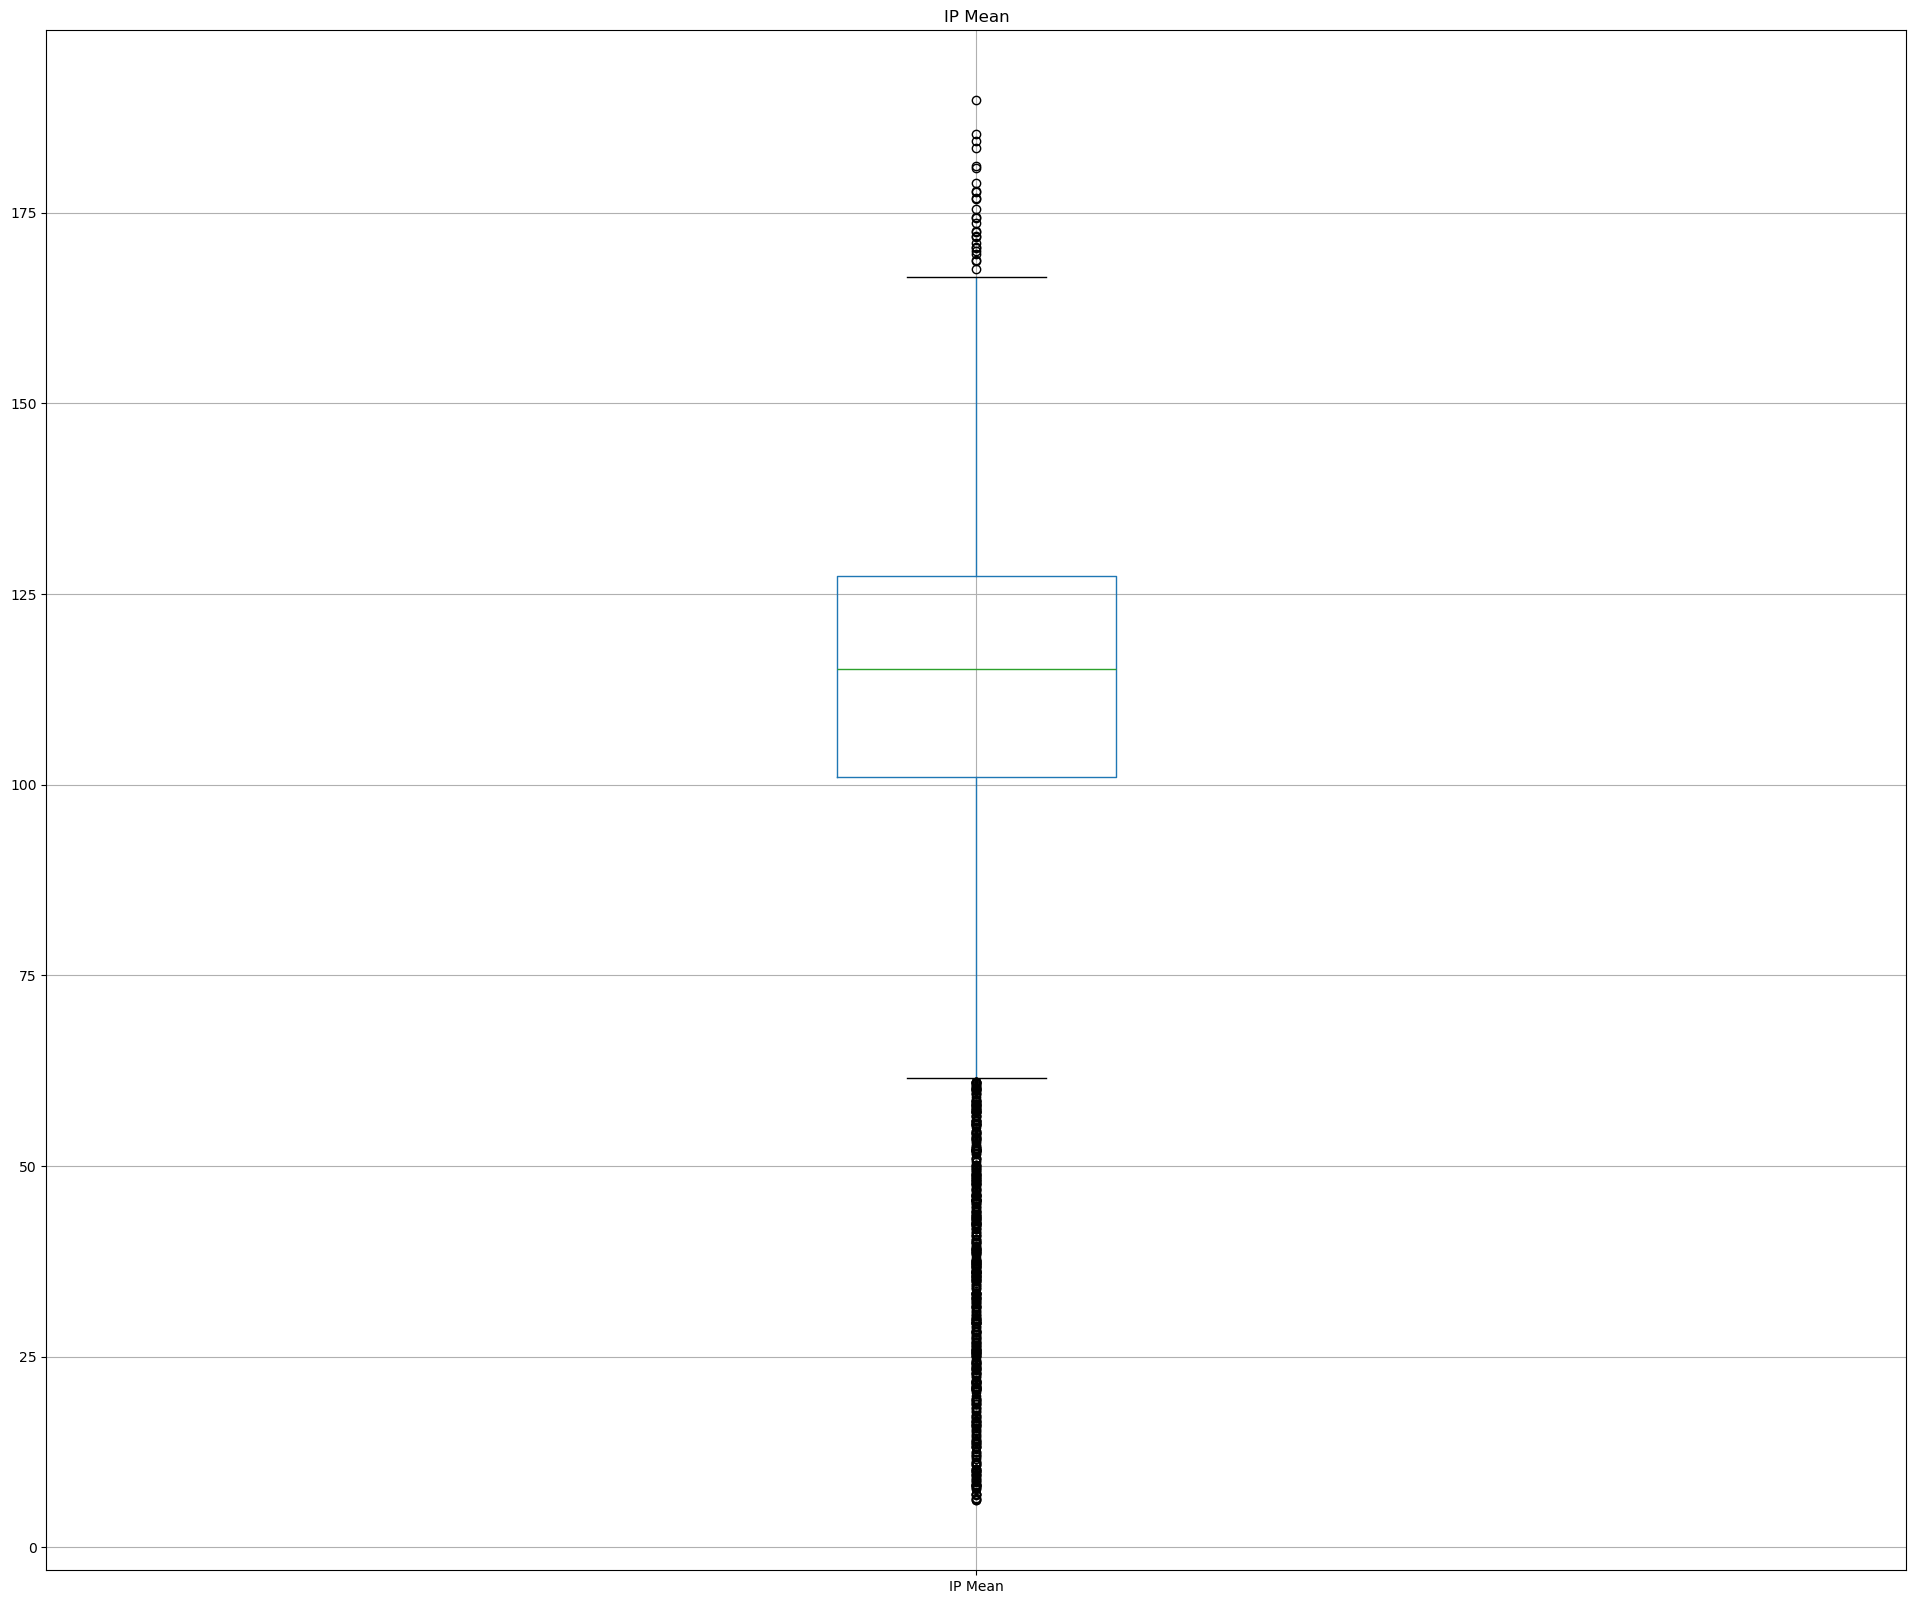

In [83]:
plt.figure(figsize = (24, 20))

fig = df.boxplot(column = 'IP Mean')
fig.set_title('IP Mean')

Text(0.5, 1.0, 'IP Sd')

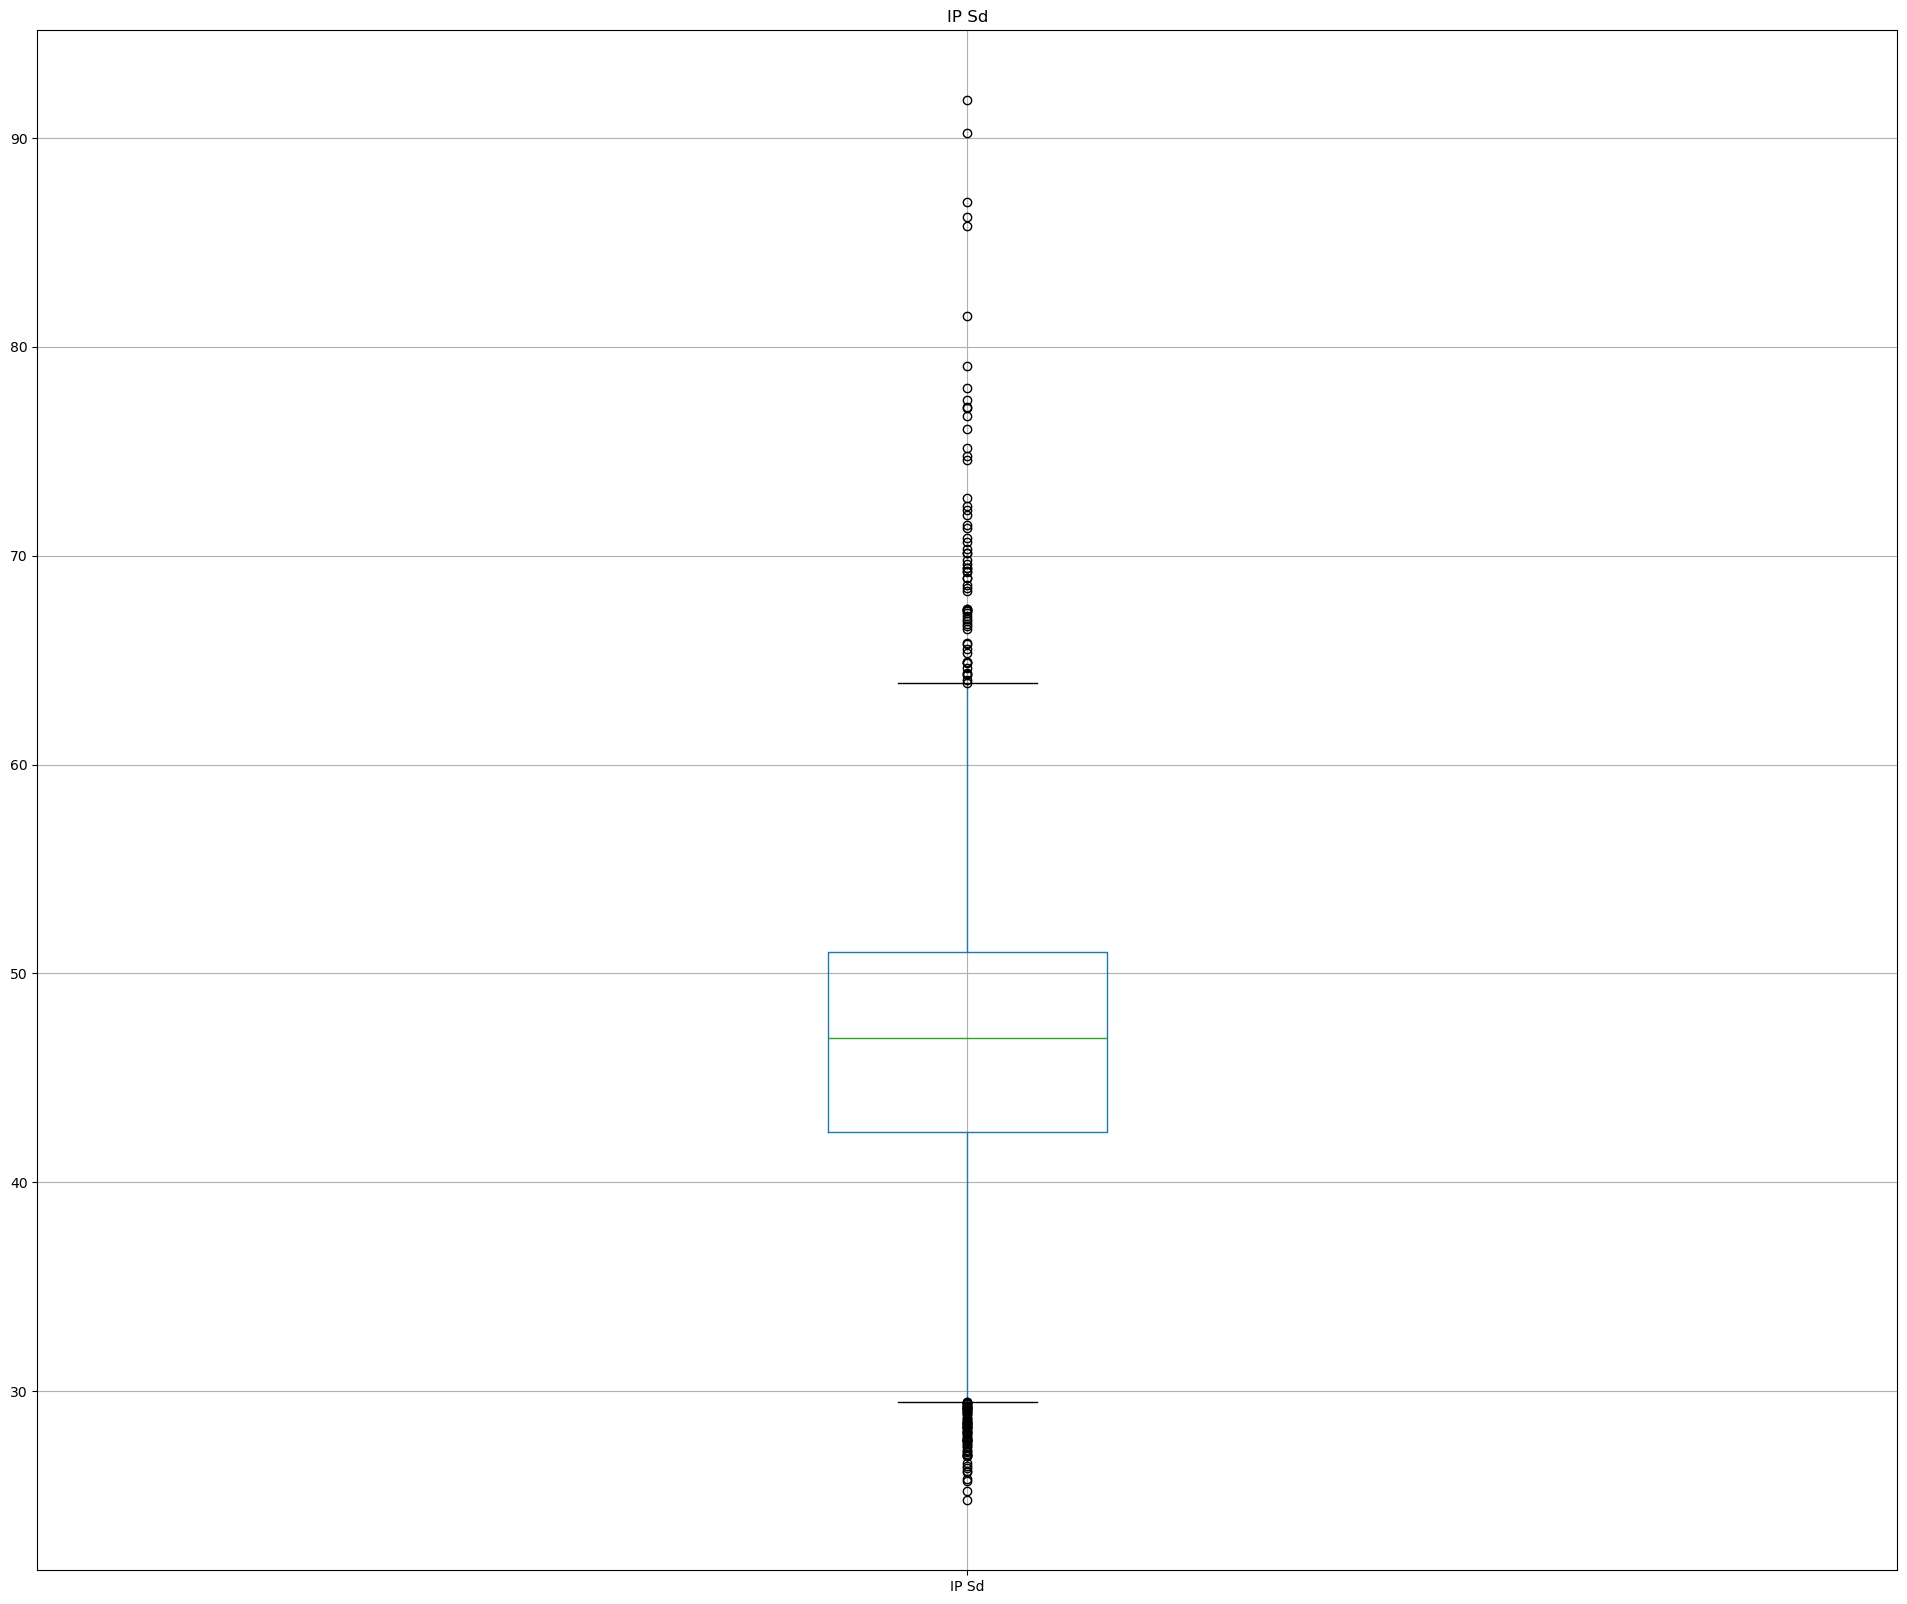

In [85]:
plt.figure(figsize = (24, 20))

fig = df.boxplot(column = 'IP Sd')
fig.set_title('IP Sd')

Text(0.5, 1.0, 'IP Kurtosis')

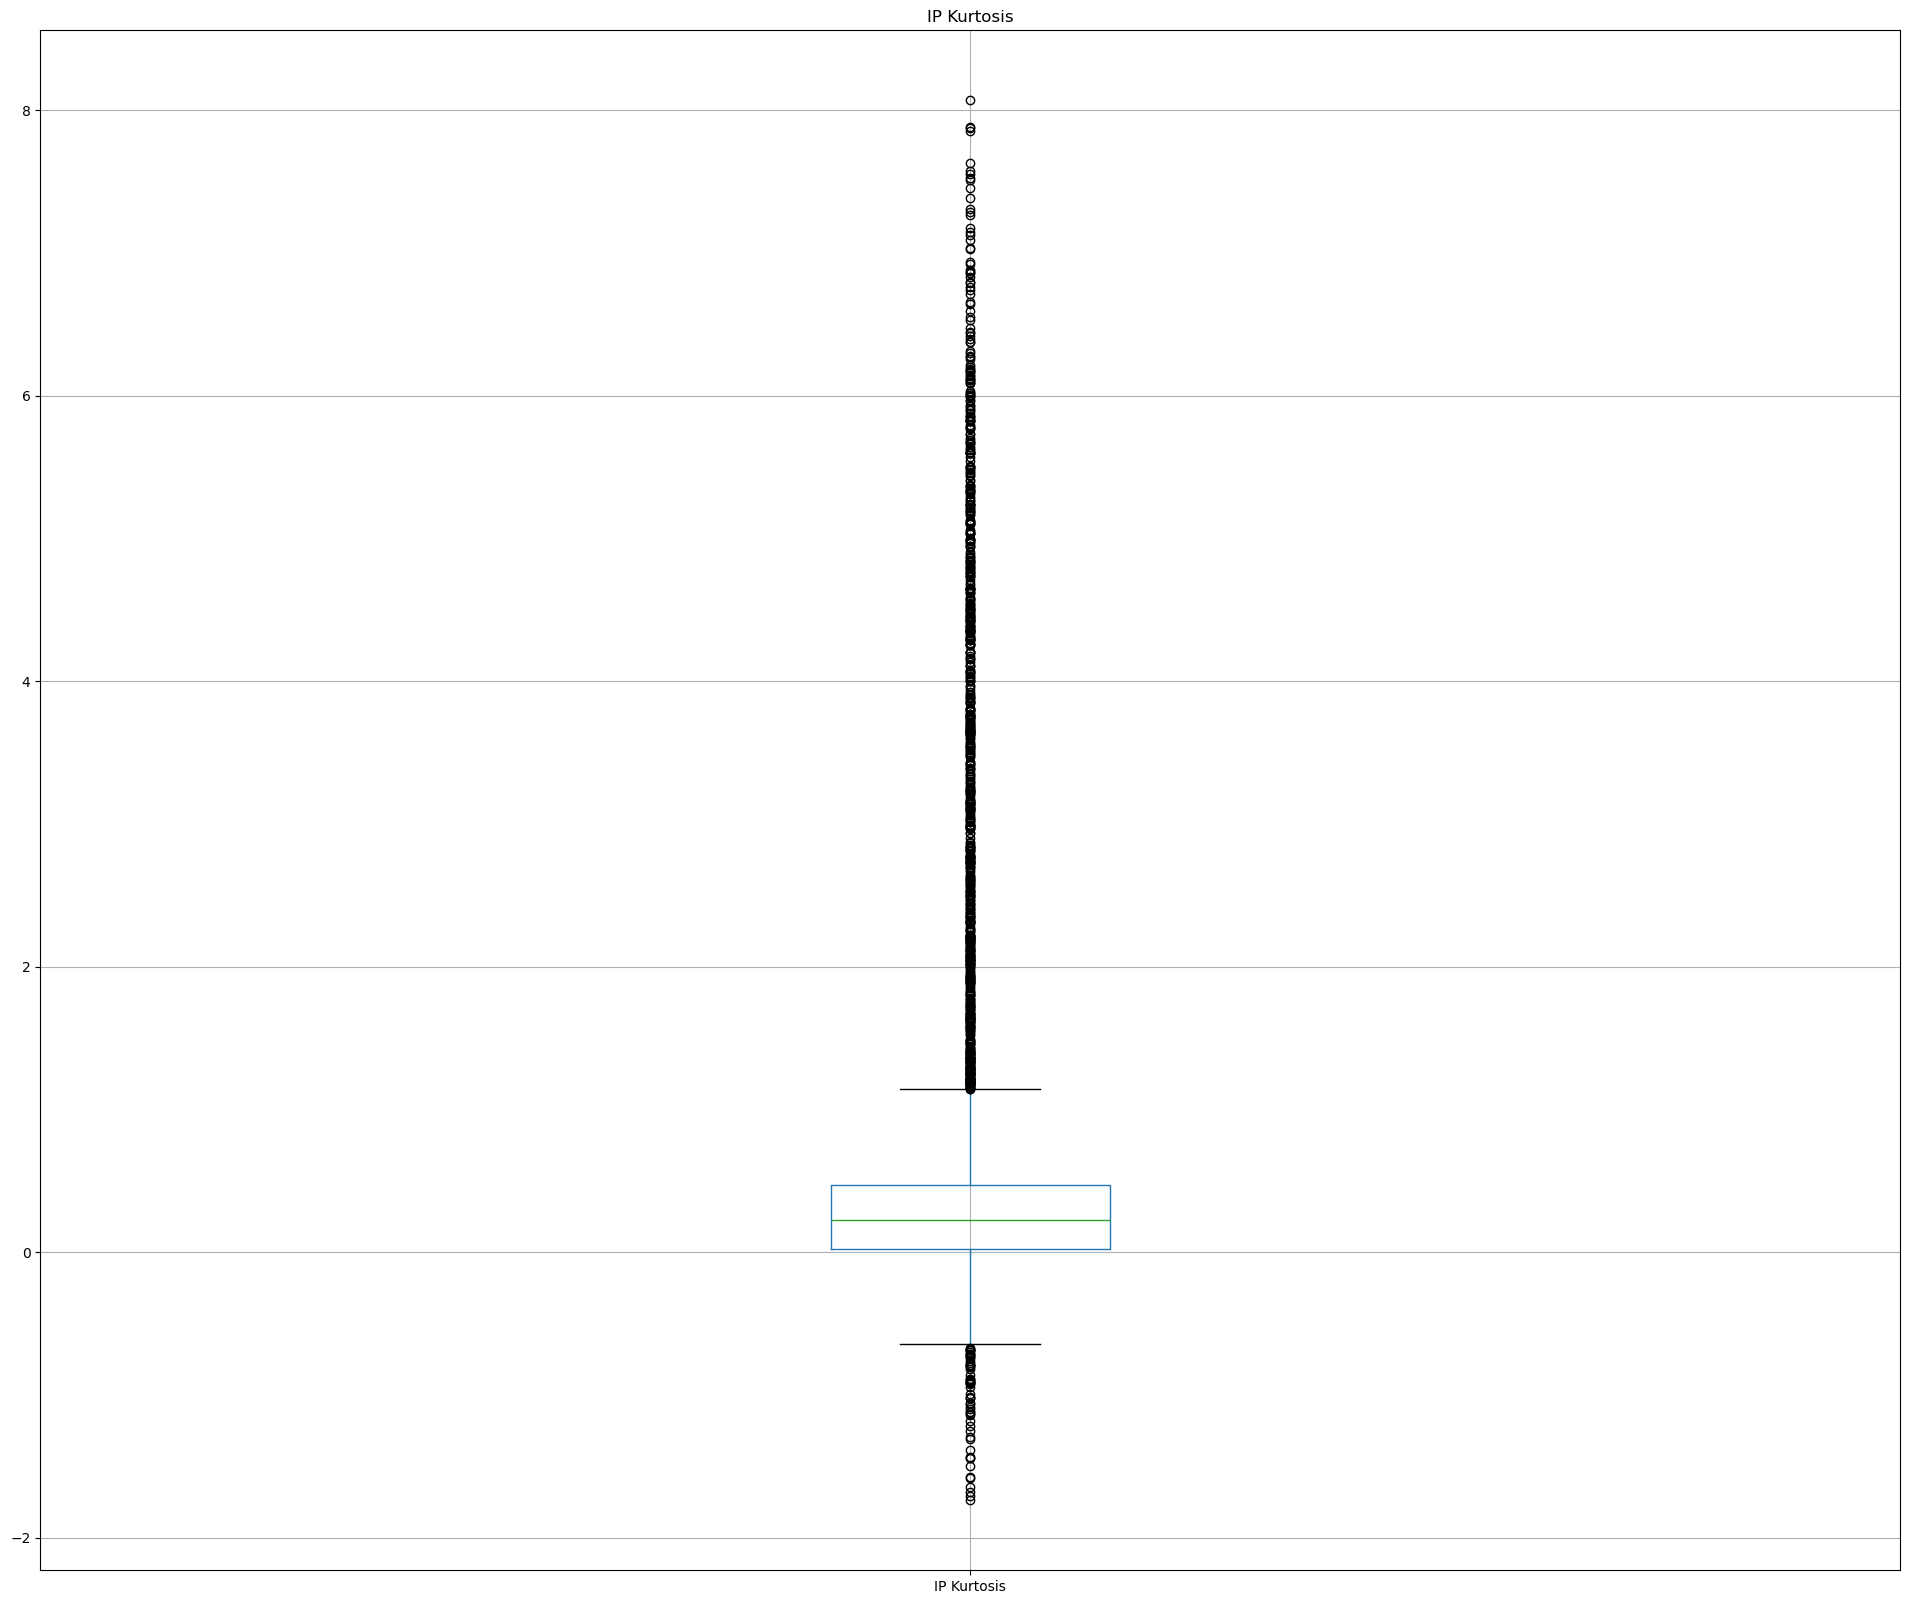

In [88]:
plt.figure(figsize = (24, 20))

fig = df.boxplot(column = 'IP Kurtosis')
fig.set_title('IP Kurtosis')

Text(0.5, 1.0, 'IP Skewness')

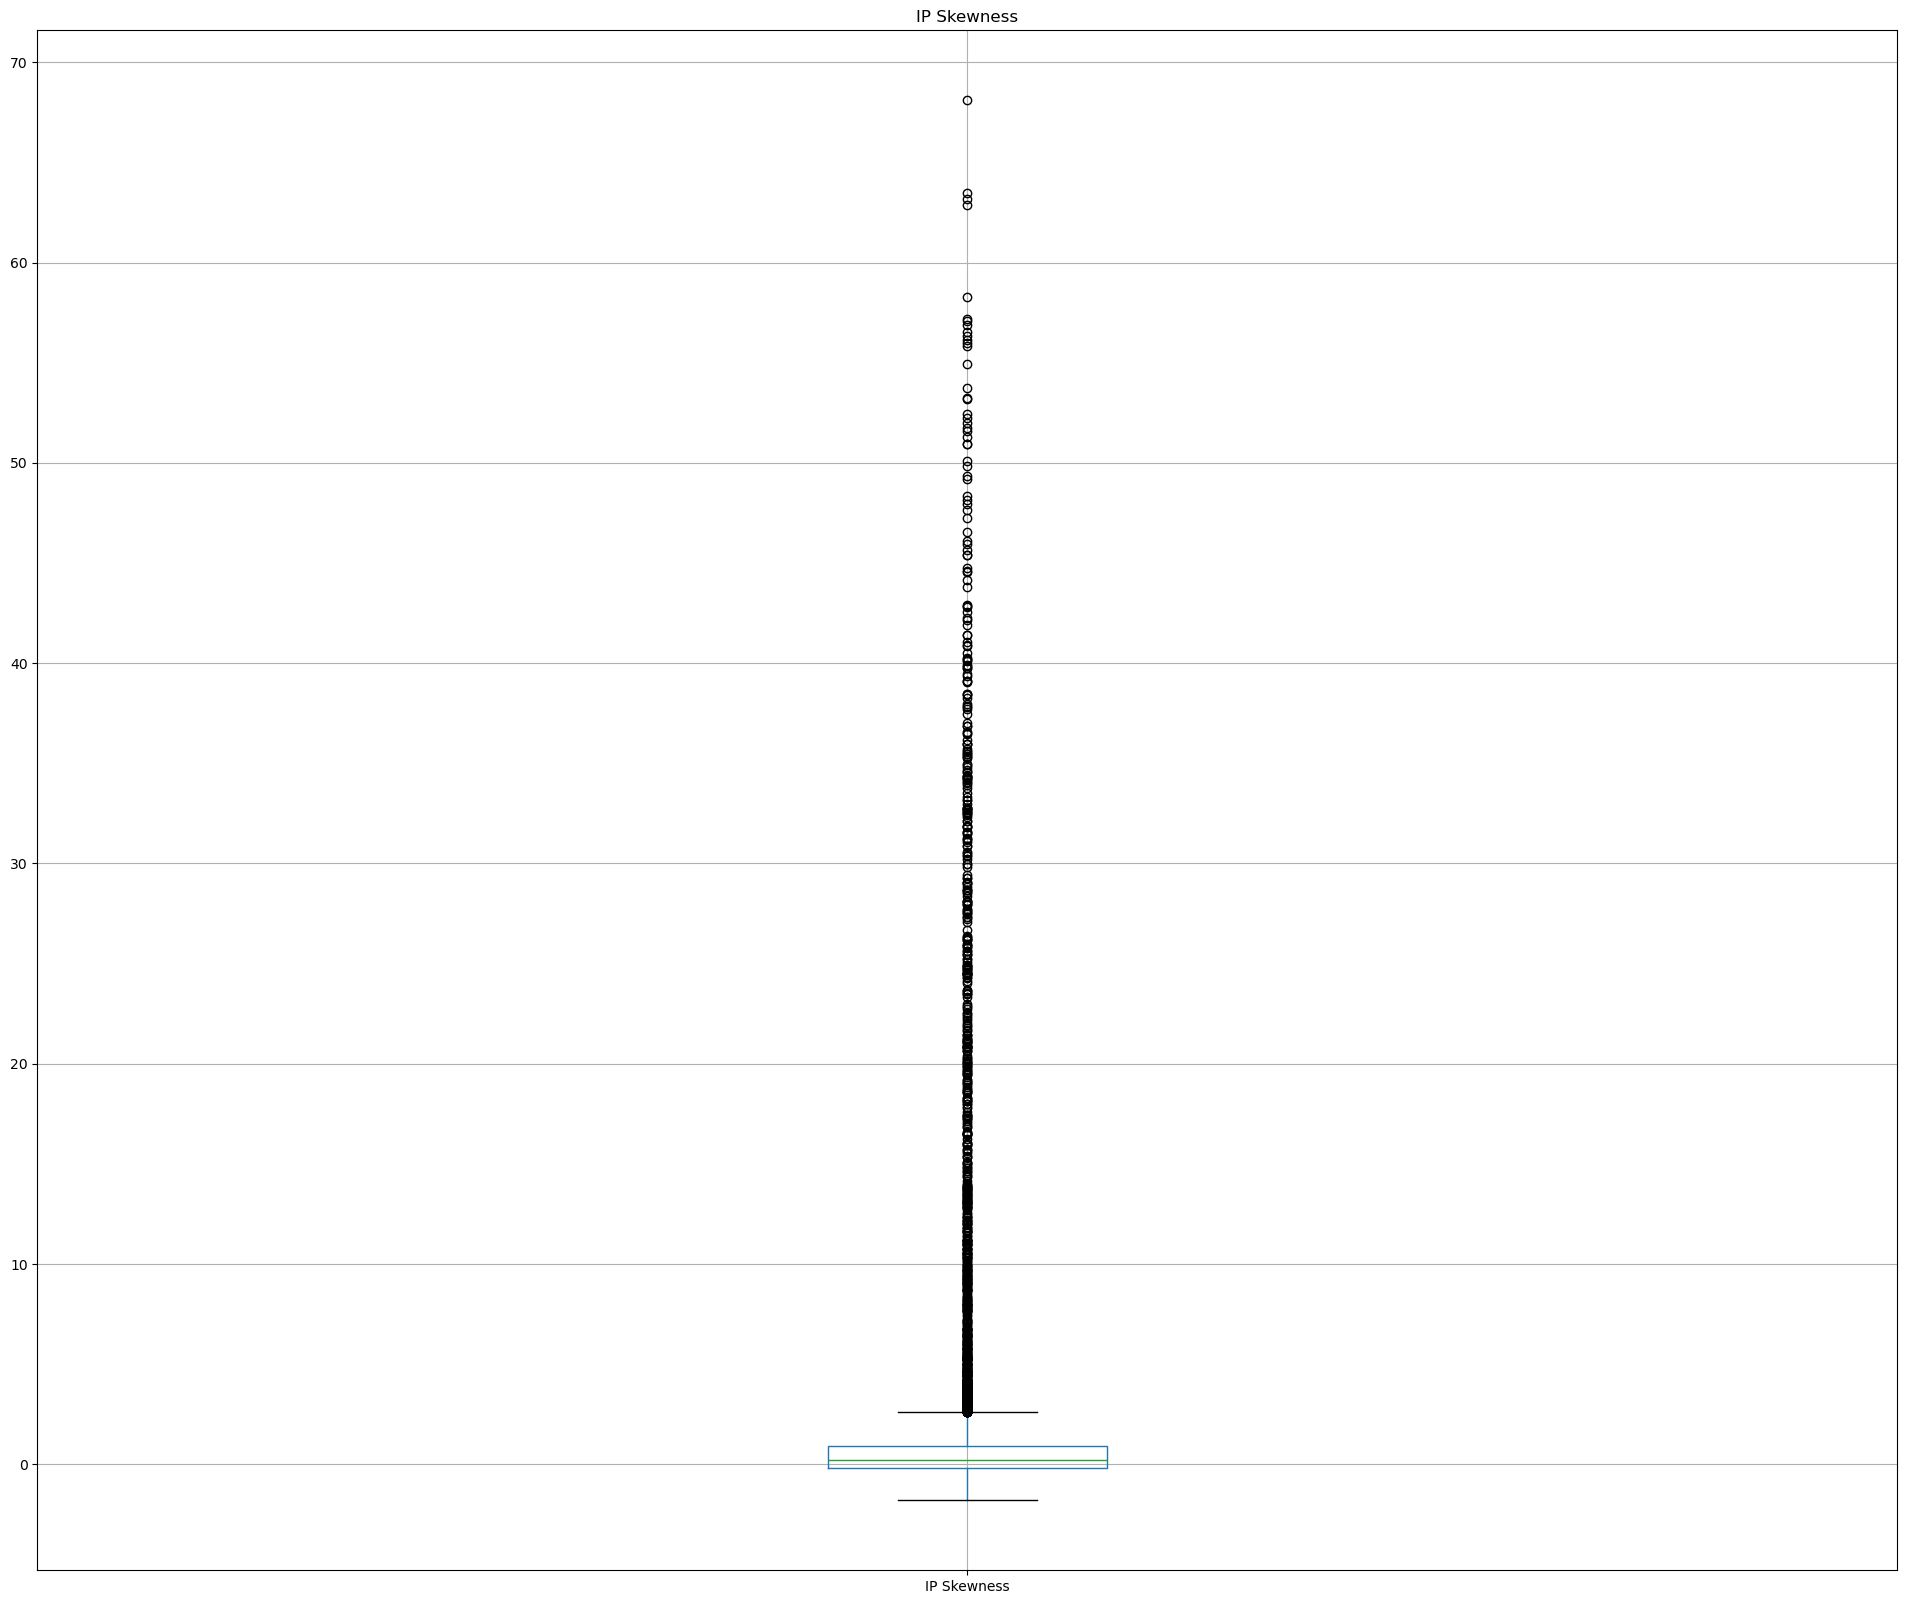

In [90]:
plt.figure(figsize = (24, 20))

fig = df.boxplot(column = 'IP Skewness')
fig.set_title('IP Skewness')

Text(0.5, 1.0, 'DM_SNR Mean')

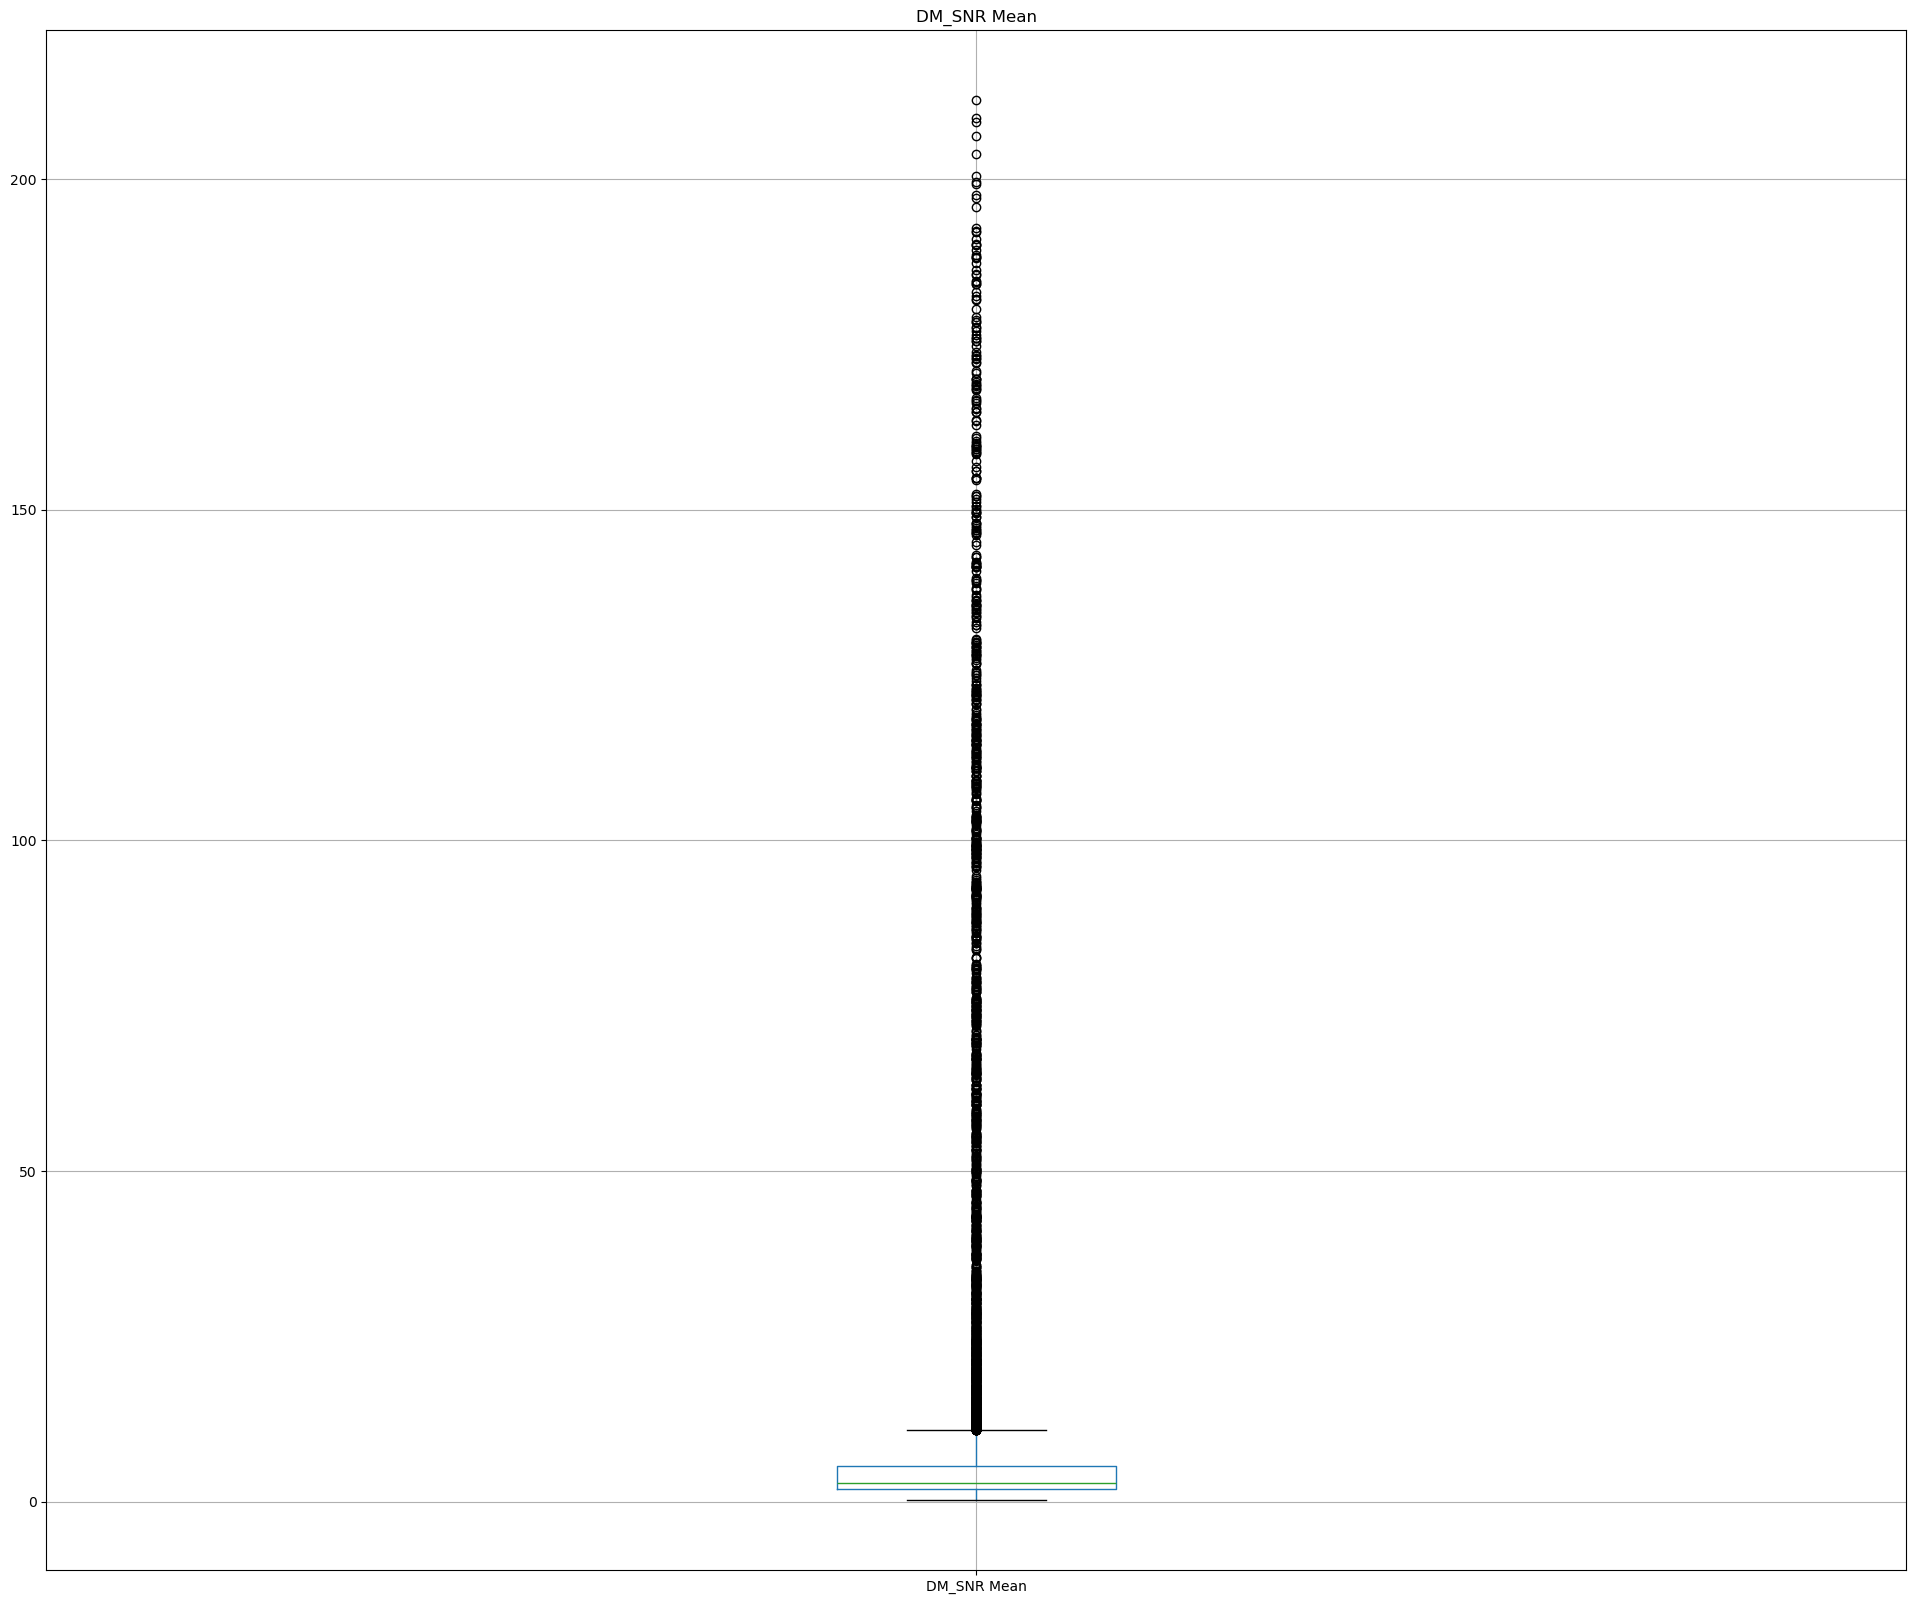

In [92]:
plt.figure(figsize = (24, 20))

fig = df.boxplot(column = 'DM_SNR Mean')
fig.set_title('DM_SNR Mean')

Text(0.5, 1.0, 'DM_SNR Kurtosis')

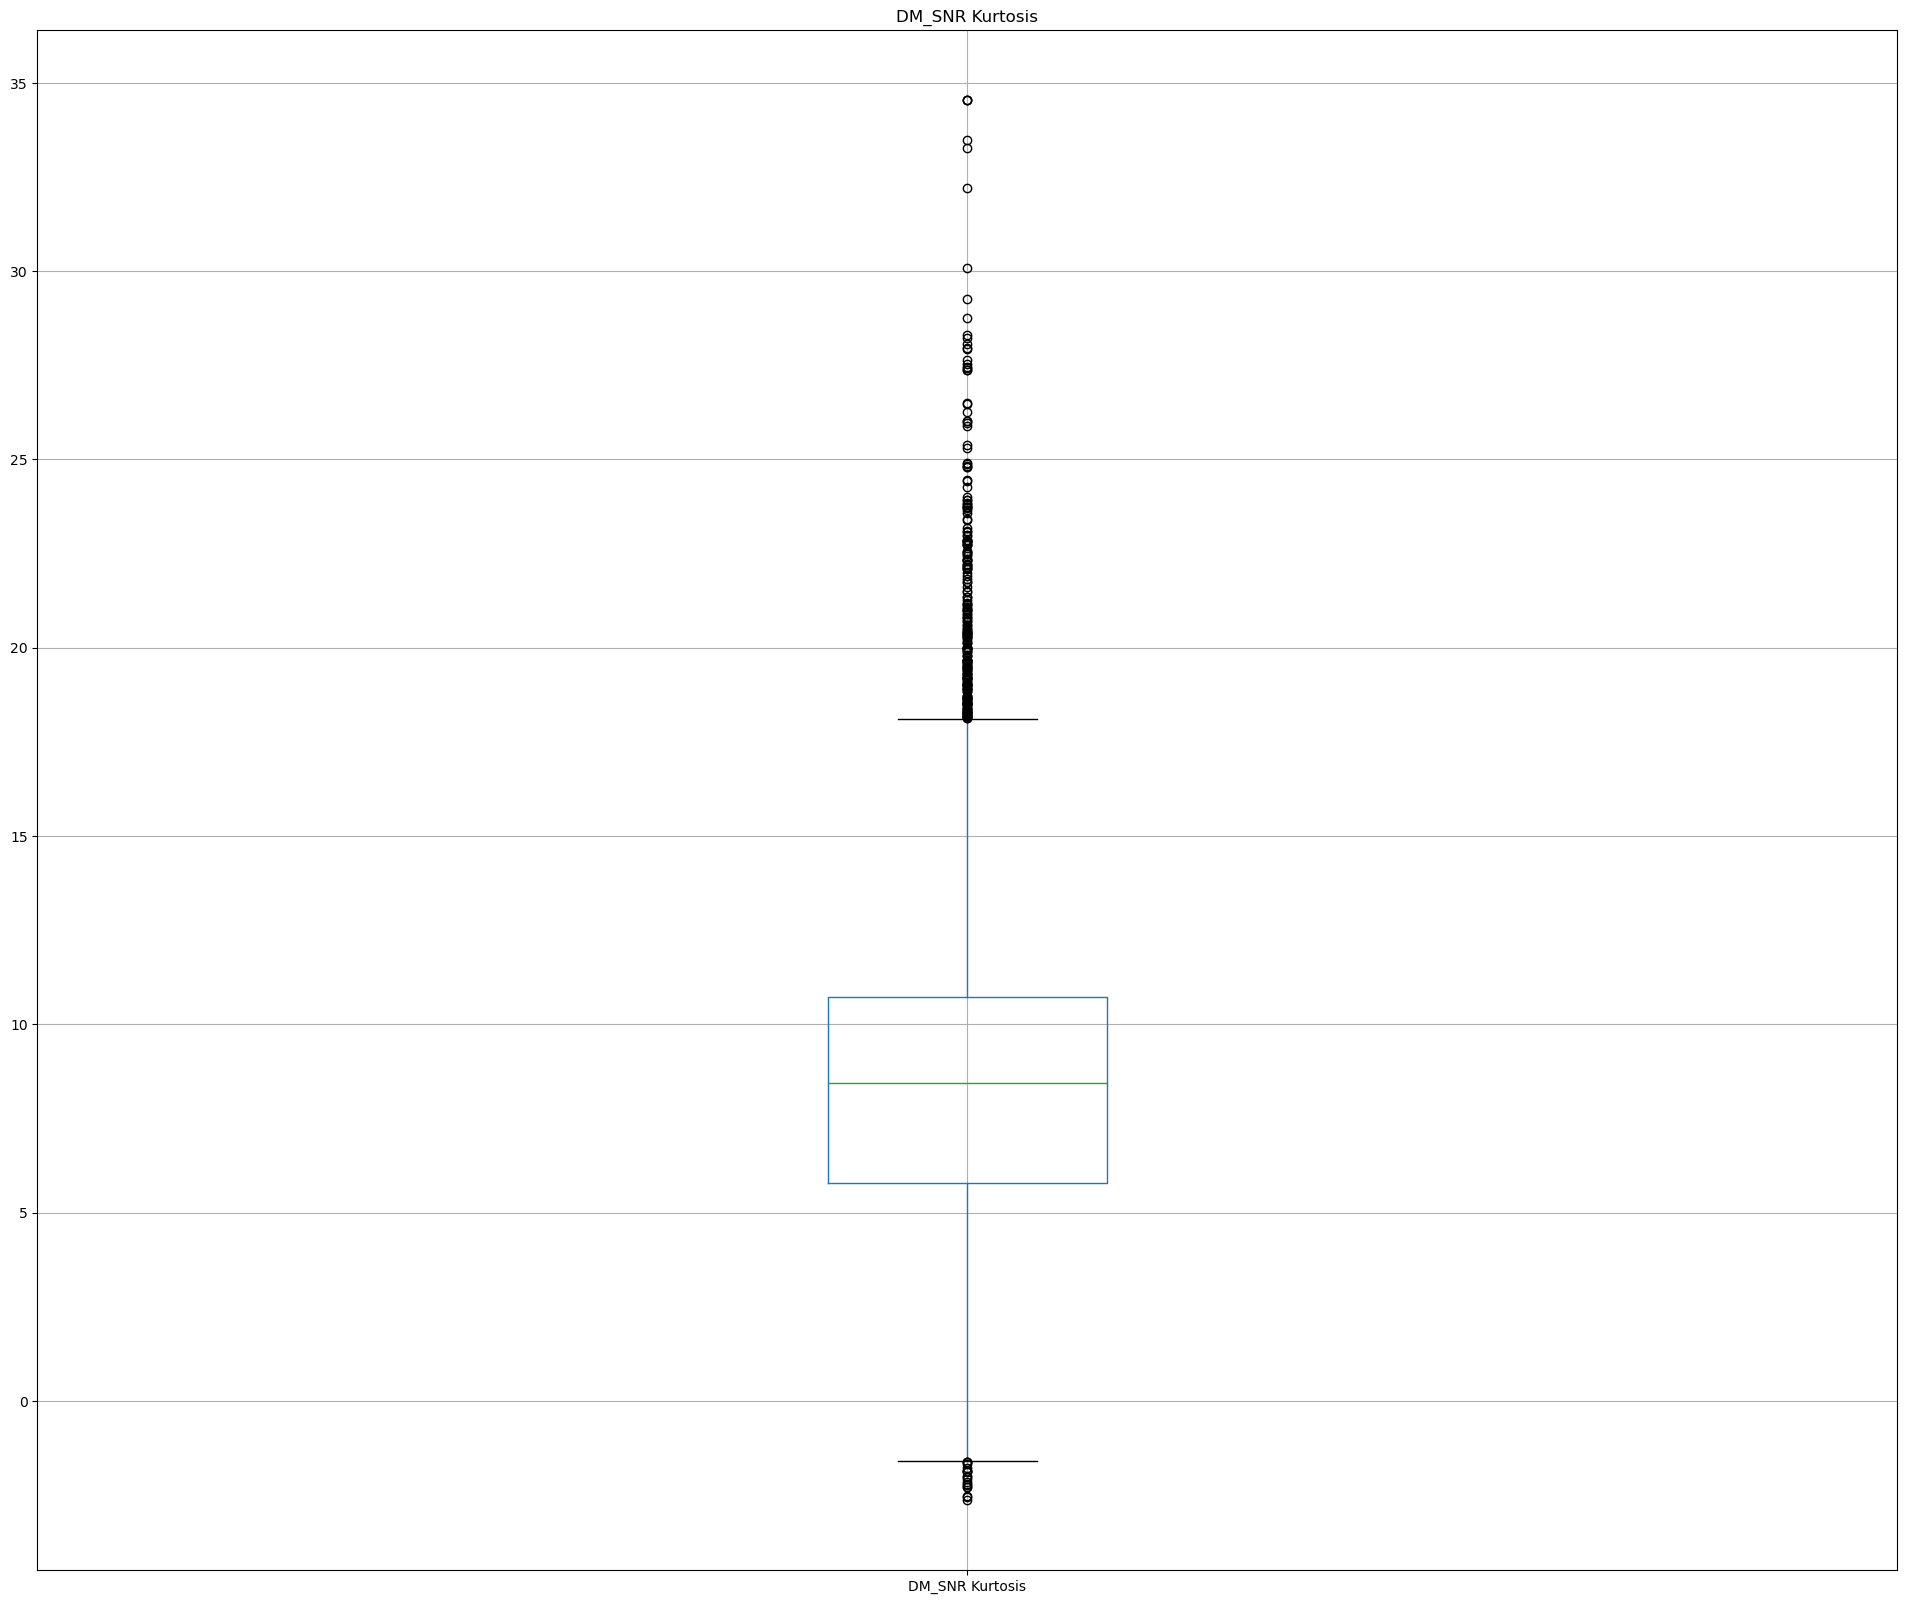

In [94]:
plt.figure(figsize = (24, 20))

fig = df.boxplot(column = 'DM_SNR Kurtosis')
fig.set_title('DM_SNR Kurtosis')

Text(0.5, 1.0, 'DM_SNR Skewness')

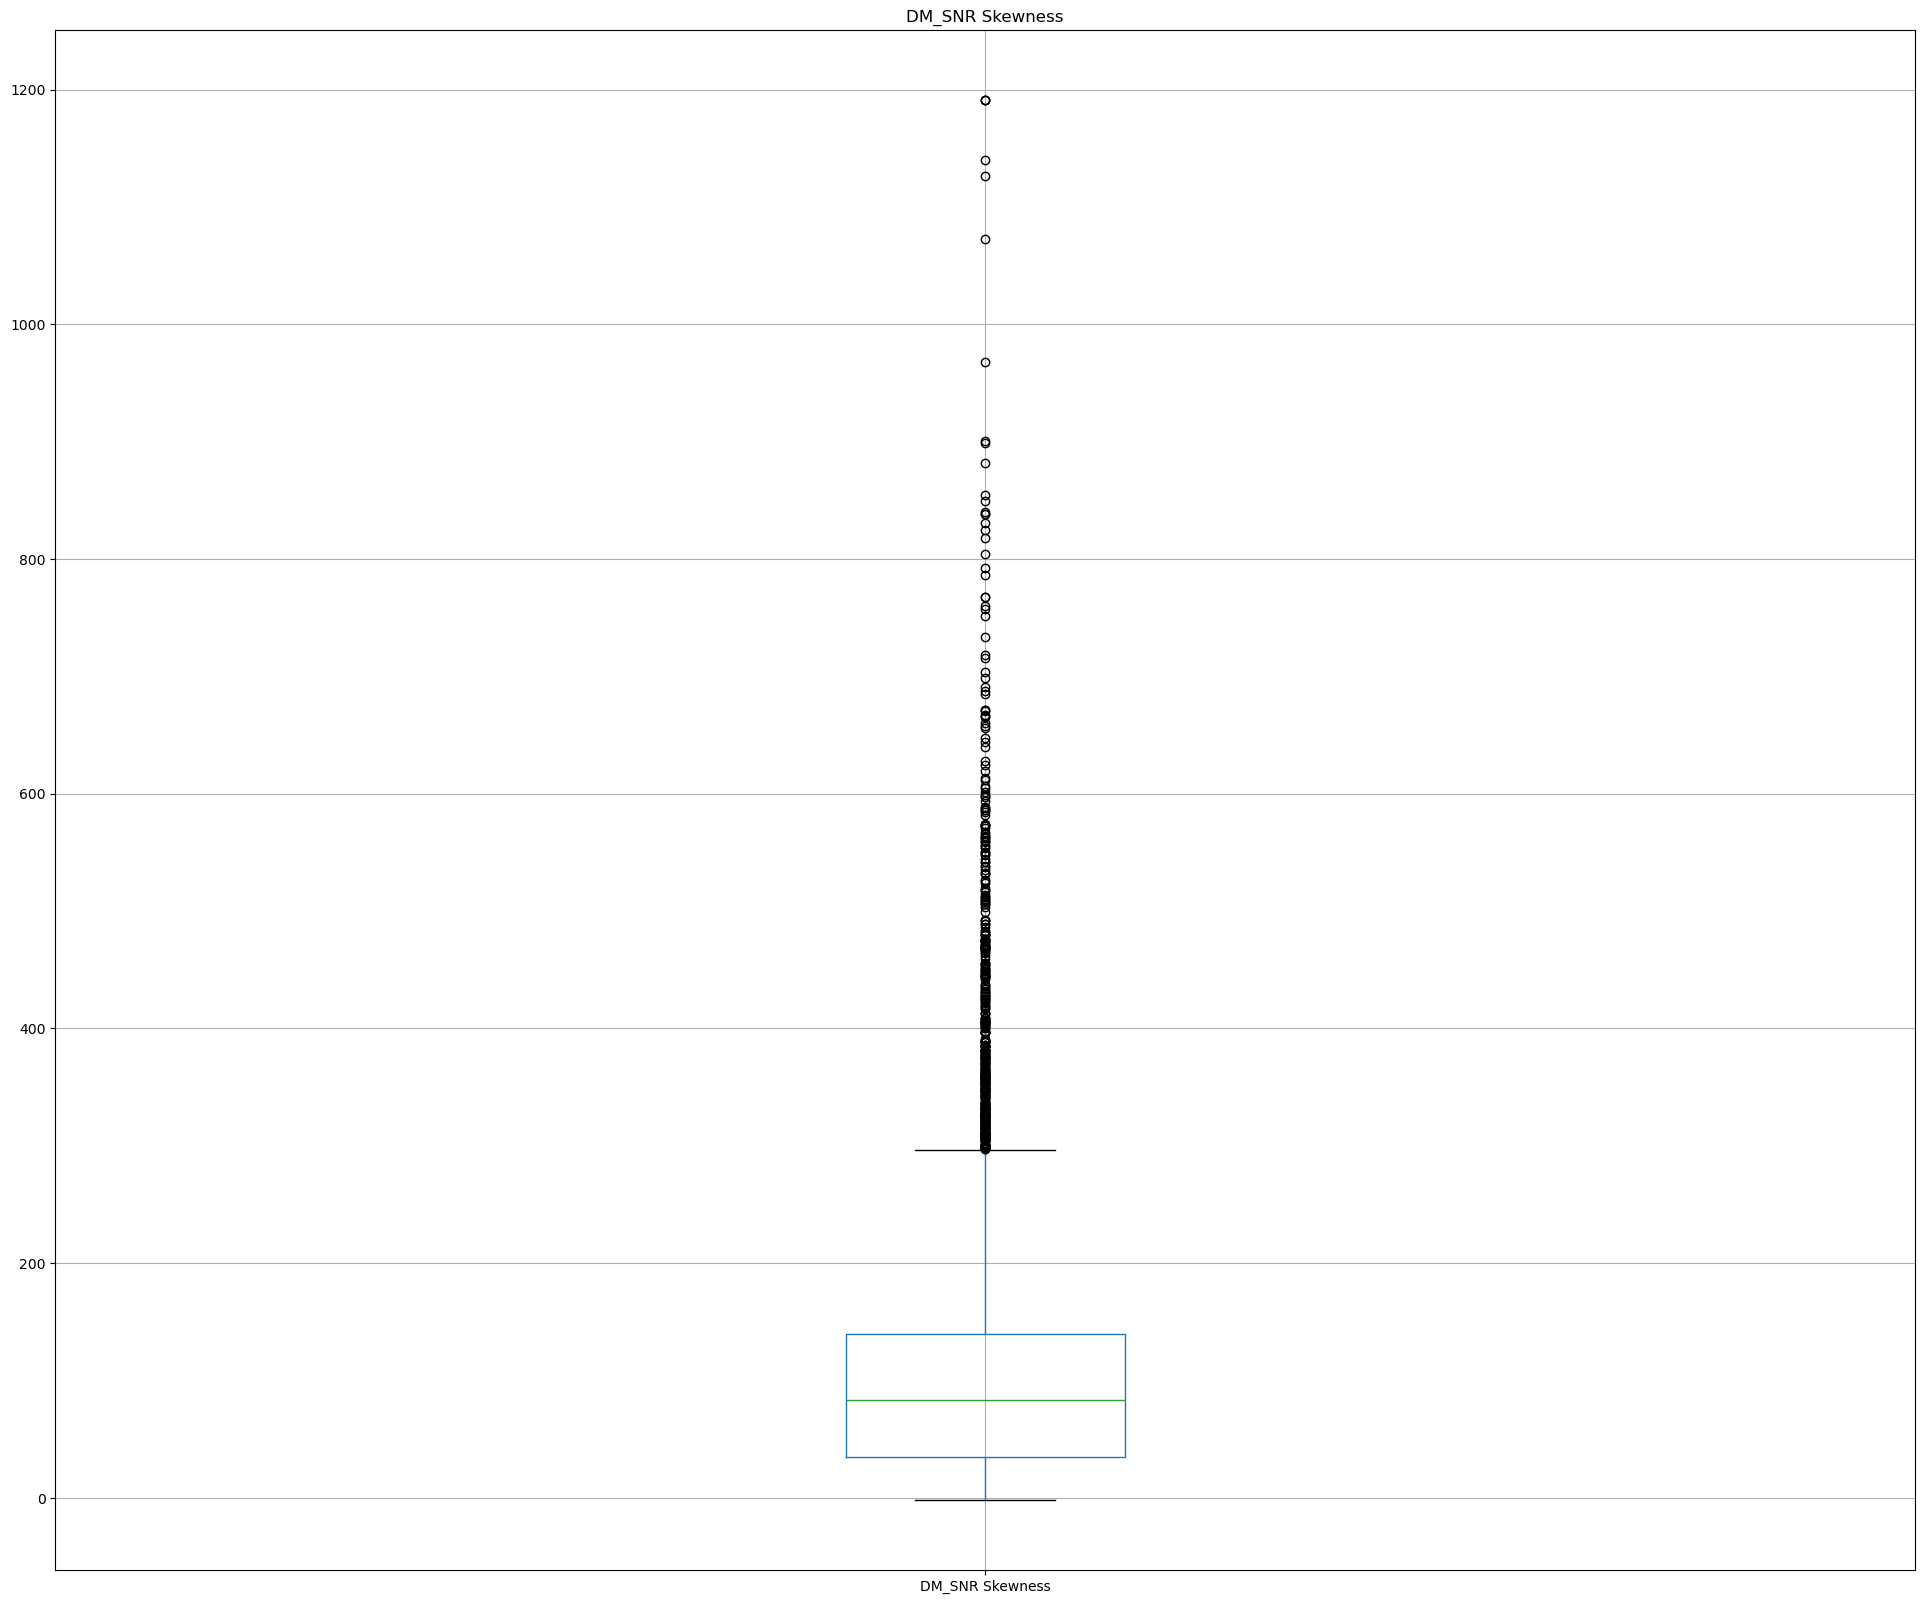

In [96]:
plt.figure(figsize = (24, 20))

fig = df.boxplot(column = 'DM_SNR Skewness')
fig.set_title('DM_SNR Skewness')

## DECLARE FEATURES AND TARGET VARIABLE

In [103]:
x = df.drop(['target_class'], axis = 1)
y = df['target_class']

In [105]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 0)

In [107]:
x_train.shape, x_test.shape

((7418, 8), (1855, 8))

## FEATURE SCALING

In [110]:
cols = x_train.columns

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [118]:
x_train = pd.DataFrame(x_train, columns = [cols])
x_test = pd.DataFrame(x_test, columns = [cols])

In [120]:
x_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM_SNR Mean,DM_SNR Sd,DM_SNR Kurtosis,DM_SNR Skewness
count,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03
mean,1.503845e-16,2.686806e-16,2.777803e-17,1.101542e-17,-4.214597e-17,-2.107298e-17,8.812339e-17,3.352520e-18
std,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00
min,-4.062595e+00,-3.195114e+00,-2.039801e+00,-5.630418e-01,-4.201420e-01,-9.704665e-01,-2.413736e+00,-9.966851e-01
25%,-3.886562e-01,-6.095197e-01,-4.225747e-01,-3.146418e-01,-3.626540e-01,-6.104157e-01,-5.597244e-01,-6.548497e-01
50%,1.634366e-01,6.559767e-02,-2.410595e-01,-2.543538e-01,-3.327143e-01,-4.046059e-01,2.075082e-02,-2.092757e-01
75%,6.275847e-01,6.658203e-01,-1.245402e-02,-1.410595e-01,-2.422847e-01,1.101465e-01,5.199843e-01,3.063228e-01
max,2.870438e+00,5.964328e+00,6.785511e+00,9.540137e+00,6.768125e+00,4.336626e+00,5.744530e+00,9.966367e+00


## RUN SVM WITH DEFAULT PARAMETERS

In [123]:
from sklearn.svm import SVC

svc = SVC()

In [125]:
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [127]:
from sklearn.metrics import accuracy_score

In [129]:
accuracy_score(y_test, y_pred)

0.9730458221024259

## RUN SVM WITH RBF KERNEL AND c = 100.0

In [136]:
svc = SVC(C = 100.0)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
accuracy_score(y_test, y_pred)

0.9762803234501348

## RUN SVM WITH RBF KERNEL AND c = 1000.0

In [144]:
svc = SVC(C = 100.0)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
accuracy_score(y_test, y_pred)

0.9762803234501348

## RUN SVM WITH LINEAR KERNEL

In [147]:
svc = SVC(kernel = 'linear', C = 100.0)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
accuracy_score(y_test, y_pred)

0.9746630727762803

## RUN SVM WITH POLYNOMIAL KERNEL

In [152]:
svc = SVC(kernel = 'poly' , C = 100.0)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
accuracy_score(y_test, y_pred)

0.9725067385444744

## RUN SVM WITH SIGMOID KERNEL

In [155]:
svc = SVC(kernel = 'sigmoid', C = 100.0)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
accuracy_score(y_test, y_pred)

0.8636118598382749